<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/IG_Reach_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import PassiveAggressiveRegressor
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Instagram data.csv', encoding='latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



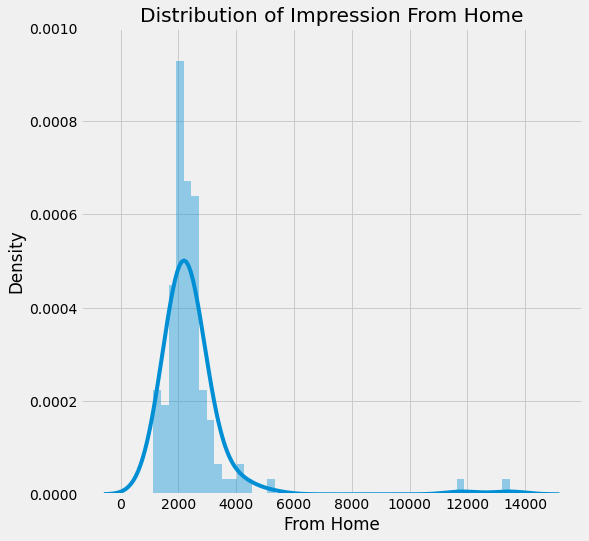

In [15]:
plt.figure(figsize=(8,8))
plt.title('Distribution of Impression From Home')
sns.distplot(data['From Home'])
plt.ylim(0,0.0010)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



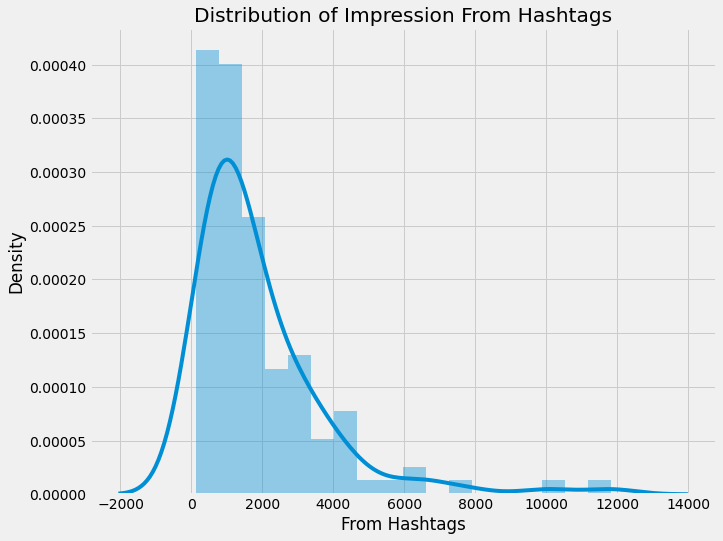

In [19]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Impression From Hashtags')
sns.distplot(data['From Hashtags'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



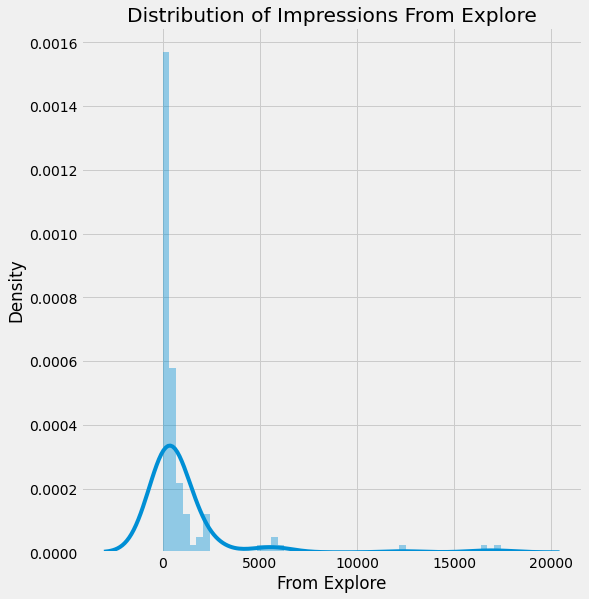

In [20]:
plt.figure(figsize=(8,9))
plt.title('Distribution of Impressions From Explore')
sns.distplot(data['From Explore'])
plt.show()

In [23]:
home = data['From Home'].sum()
hastags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other']

labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = [home, hastags, explore, other]

px.pie(data, values=values, names=labels,
       title ='Impressions on Instagram Posts From Various Sources', hole=0.3)

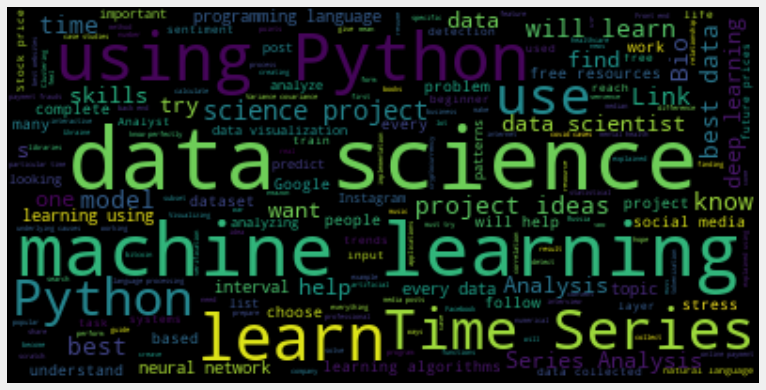

In [24]:
text = " ".join(i for i in data.Caption)
stopwords= set(STOPWORDS) 
wordcloud = WordCloud(stopwords=stopwords, background_color='black').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

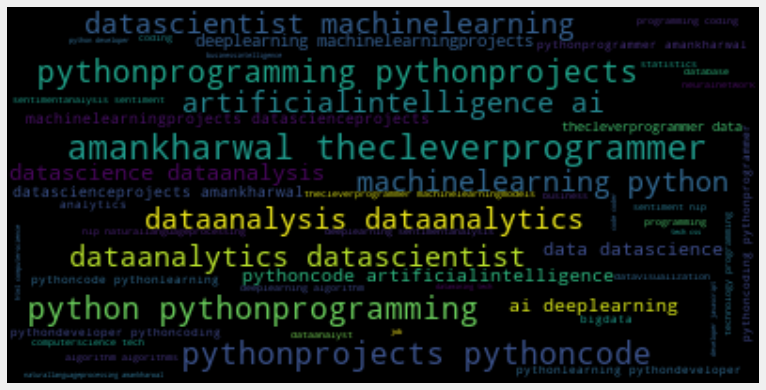

In [25]:
text = " ".join(i for i in data.Hashtags)
stopwords= set(STOPWORDS) 
wordcloud = WordCloud(stopwords=stopwords, background_color='black').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [27]:
px.scatter(data_frame=data, x='Impressions',
           y='Likes', size='Likes', trendline="ols",
           title = "Relationship Between Likes and Impressions")

In [28]:
px.scatter(data_frame=data, x='Impressions',
           y='Comments', size='Comments', trendline='ols',
           title = "Relationship Between Comments and Total Impressions")

In [29]:
px.scatter(data_frame=data, x='Impressions',
           y="Likes", size="Likes", trendline="ols",
           title = "Relationship Between Shares and Total Impressions")

In [31]:
px.scatter(data_frame=data, x='Impressions',
           y='Saves', size='Saves', trendline='ols',
           title = "Relationship Between Post Saves and Total Impressions")

In [35]:
data.corr()['Impressions']

Impressions       1.000000
From Home         0.844698
From Hashtags     0.560760
From Explore      0.893607
From Other        0.592960
Saves             0.779231
Comments         -0.028524
Shares            0.634675
Likes             0.849835
Profile Visits    0.760981
Follows           0.889363
Name: Impressions, dtype: float64

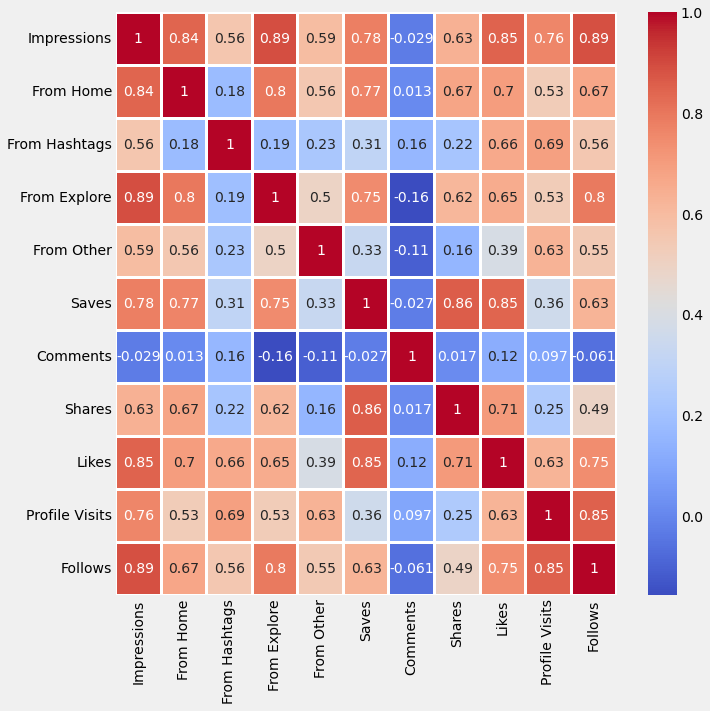

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), linecolor='white', linewidths= 2, annot=True, cmap='coolwarm')

In [49]:
data.corr().style.background_gradient(cmap='RdBu', vmin=-1, vmax=1).set_sticky(axis='index')

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.844698,0.560760,0.893607,0.592960,0.779231,-0.028524,0.634675,0.849835,0.760981,0.889363
From Home,0.844698,1.000000,0.177516,0.800573,0.555666,0.768817,0.012716,0.674985,0.698330,0.531076,0.672675
From Hashtags,0.560760,0.177516,1.000000,0.190453,0.229623,0.305929,0.161439,0.219511,0.662124,0.691345,0.555485
From Explore,0.893607,0.800573,0.190453,1.000000,0.495685,0.747803,-0.158565,0.615731,0.653699,0.531850,0.796019
From Other,0.592960,0.555666,0.229623,0.495685,1.000000,0.331907,-0.108703,0.156834,0.393510,0.633080,0.546737
Saves,0.779231,0.768817,0.305929,0.747803,0.331907,1.000000,-0.026912,0.860324,0.845643,0.360628,0.628461
Comments,-0.028524,0.012716,0.161439,-0.158565,-0.108703,-0.026912,1.000000,0.016933,0.123586,0.096714,-0.060631
Shares,0.634675,0.674985,0.219511,0.615731,0.156834,0.860324,0.016933,1.000000,0.707794,0.245361,0.493070
Likes,0.849835,0.698330,0.662124,0.653699,0.393510,0.845643,0.123586,0.707794,1.000000,0.626107,0.746333
Profile Visits,0.760981,0.531076,0.691345,0.531850,0.633080,0.360628,0.096714,0.245361,0.626107,1.000000,0.853152


In [48]:
conversion_rate = np.around((data["Follows"].sum()/data["Profile Visits"].sum())*100,2)
print(conversion_rate)

41.0


In [50]:
px.scatter(data_frame=data, x='Profile Visits',
           y='Follows', size='Follows', trendline='ols',
           title = "Relationship Between Profile Visits and Followers Gained")

In [52]:
x = np.array(data[['Likes', 'Saves', 'Comments','Shares',
                   'Profile Visits','Follows']])
y = np.array(data['Impressions']) 

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [53]:
model = PassiveAggressiveRegressor()
model.fit(x_train,y_train)
model.score(x_test, y_test)


0.8679790399083187

In [54]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10032.5345505])

In [ ]:
# https://thecleverprogrammer.com/2022/03/22/instagram-reach-analysis-using-python/